In [20]:
import numpy as np
import librosa
import os
from scipy.ndimage import zoom
from moviepy.video.io.VideoFileClip import VideoFileClip
from moviepy.audio.io.AudioFileClip import AudioFileClip
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Activation, BatchNormalization, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import visualkeras
from PIL import ImageFont
import IPython.display as ipd
import scipy
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import soundfile as sf

In [ ]:
def convert_to_wav(file_path):
    """Converts the given file to WAV format"""
    name, ext = os.path.splitext(file_path)
    if ext in ('.mp3', '.mp4') and not os.path.basename(file_path).startswith('.'):
        wav_path = name + '.wav'
        if ext == '.mp4':
            clip = VideoFileClip(file_path)
            audio_clip = clip.audio
            audio_clip.write_audiofile(wav_path)
            clip.close()
            audio_clip.close()
        elif ext == '.mp3':
            audio_clip = AudioFileClip(file_path)
            audio_clip.write_audiofile(wav_path)
            audio_clip.close()

def convert_folder_to_wav(folder_path):
    """Recursively scans the given folder and converts all media files to WAV format"""
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            convert_to_wav(file_path)

# Example usage
convert_folder_to_wav('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips')


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34934206.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510810.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578267.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35517614.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36127498.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244010.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35440163.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36456072.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971596.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410781.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018667.wav


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35887927.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365485.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453817.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35182181.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35335779.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35956402.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36030546.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242965.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319979.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369276.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36507547.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209443.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580389.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511194.wav
MoviePy - Done.


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384789.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175373.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319994.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35480523.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953765.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668477.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389720.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35766215.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931444.wav
MoviePy - Done.


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301149.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492240.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926047.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170425.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281922.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353269.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35068102.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35595921.wav
MoviePy - Done.


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35335569.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34939476.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414411.wav


chunk:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35049071.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059170.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056598.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287164.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352939.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421559.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36497579.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35410567.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484751.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35119415.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498361.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35129712.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288507.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244116.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018505.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34990013.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34930835.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354079.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243708.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353344.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460721.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35480527.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072494.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35183993.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36408955.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416324.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436126.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455284.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288695.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35982004.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35051700.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197450.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580947.wav
MoviePy - Done.


chunk:   0%|          | 0/197 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410578.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35274461.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36363612.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36377118.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35039386.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35049089.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280718.wav
MoviePy - Done.


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35123218.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35577595.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170908.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35457214.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072492.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092294.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35183995.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888377.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36289705.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144107.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35246047.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36477503.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35149991.wav
MoviePy - Done.


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948238.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35786964.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000424.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209359.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365635.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35395532.wav


chunk:   0%|          | 0/175 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35765088.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35071218.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469960.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36127406.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729929.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402313.wav
MoviePy - Done.


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175561.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35065783.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926812.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352160.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35518117.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379290.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413368.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410461.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159604.wav


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35934567.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469850.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34965023.wav


chunk:   0%|          | 0/163 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35433456.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35453258.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35679828.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018597.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028294.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36411274.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460573.wav
MoviePy - Done.


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36524210.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517094.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36193835.wav


chunk:   0%|          | 0/233 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459357.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35479155.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36463923.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36483725.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36387963.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333894.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36239217.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34943368.wav
MoviePy - Done.


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218778.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35399770.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35734332.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299840.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925947.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36409044.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35382680.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36514012.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34935775.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35805825.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018633.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300631.wav
MoviePy - Done.


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35313254.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35411231.wav


chunk:   0%|          | 0/107 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594453.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209751.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299058.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35201892.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193672.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303462.wav
MoviePy - Done.


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410399.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36390178.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803879.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578322.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36378900.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460110.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35118736.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35210019.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36508539.wav


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35201928.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961881.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35509025.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416563.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243588.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242937.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34986446.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421159.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35284615.wav


chunk:   0%|          | 0/195 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170036.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35271836.wav


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244041.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375742.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516785.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35074997.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580266.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35339597.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417113.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929805.wav
MoviePy - Done.


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333849.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397450.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457481.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303121.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412793.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432591.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36490400.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36302737.wav
MoviePy - Done.


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36322535.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36463939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603527.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243796.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067662.wav
MoviePy - Done.


chunk:   0%|          | 0/154 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455653.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35475451.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35424853.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36193956.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388334.wav
MoviePy - Done.


chunk:   0%|          | 0/207 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244002.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304823.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389228.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35376954.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35396752.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509387.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35290259.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510743.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36520440.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457422.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36497026.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926145.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458167.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579765.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439598.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457289.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35047577.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299087.wav
MoviePy - Done.


chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36359553.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379351.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382665.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384671.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509731.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305619.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961934.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059395.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193957.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35320003.wav
MoviePy - Done.


chunk:   0%|          | 0/219 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723156.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35355606.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503830.wav


chunk:   0%|          | 0/184 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35363924.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35829605.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35703978.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35970680.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523986.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287166.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35027949.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36287999.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594732.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194047.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35577044.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011461.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439907.wav
MoviePy - Done.


chunk:   0%|          | 0/174 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337745.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300640.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505809.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34960098.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503814.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388920.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803130.wav
MoviePy - Done.


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35662798.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35026775.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034832.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197732.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057112.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34943299.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196620.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366296.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35033500.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306279.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509222.wav
MoviePy - Done.


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35776112.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454264.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304835.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306225.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056836.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461309.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512109.wav


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301109.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126107.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503497.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35745529.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435899.wav
MoviePy - Done.


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319130.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243945.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293640.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067042.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34956452.wav


chunk:   0%|          | 0/172 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36526623.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944139.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170111.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301184.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381980.wav
MoviePy - Done.


chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375677.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369371.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36330411.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518308.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944137.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218638.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511177.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35634471.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36390235.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35230725.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121178.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35564347.wav


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414684.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35453344.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36133752.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461589.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36407242.wav
MoviePy - Done.


chunk:   0%|          | 0/185 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35010263.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35150152.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504647.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35261455.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523831.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34957235.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506805.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394107.wav
MoviePy - Done.


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293855.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36402842.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948629.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35249204.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35269006.wav
MoviePy - Done.


chunk:   0%|          | 0/80 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36316667.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35161334.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459412.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36318674.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244283.wav
MoviePy - Done.


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948151.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36438780.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435883.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495289.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35805838.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492972.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511294.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061603.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35703121.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35203283.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35399851.wav
MoviePy - Done.


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069767.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961967.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35782739.wav


chunk:   0%|          | 0/141 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493772.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579770.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34978017.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194049.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35764999.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580854.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36521851.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36458023.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455262.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35633944.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213937.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963980.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722696.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35390398.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333251.wav
MoviePy - Done.


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36293396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35862518.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971613.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35379537.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218541.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961879.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953795.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506661.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435511.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243912.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293617.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518045.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277791.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287496.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35754133.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963013.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441483.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36311861.wav
MoviePy - Done.


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35240688.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000391.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121993.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36440448.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35831032.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36520106.wav


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354870.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384064.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121357.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242959.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36033995.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506813.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197236.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35079338.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242877.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36491352.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35255594.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35379530.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953698.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455350.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35787469.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36278932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313115.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36409072.wav


chunk:   0%|          | 0/164 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413649.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35007764.wav


chunk:   0%|          | 0/187 [00:00<?, ?it/s, now=None]          

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35083938.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36508650.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35442279.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35240689.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35051041.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587321.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35701976.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931530.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36415792.wav
MoviePy - Done.


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35496669.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35781579.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455968.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35309639.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36132872.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436548.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34955651.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509113.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35804948.wav


chunk:   0%|          | 0/81 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661212.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35700575.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504850.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35934566.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36464481.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36526639.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929442.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36400145.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35079090.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389654.wav
MoviePy - Done.


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35083176.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35308018.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459515.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35286564.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061715.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723201.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36310546.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35582666.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429162.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509547.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453462.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120941.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668393.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34960547.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36012405.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333924.wav
MoviePy - Done.


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461274.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471375.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888026.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35409066.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35673258.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434306.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35325217.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806465.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498462.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35624913.wav


chunk:   0%|          | 0/171 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35311189.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511117.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35401817.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36071336.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413731.wav
MoviePy - Done.


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35433314.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35075141.wav


chunk:   0%|          | 0/137 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067210.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36007057.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470027.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35062222.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193925.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337670.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35202518.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35212619.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36456081.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35088623.wav
MoviePy - Done.


chunk:   0%|          | 0/187 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34989538.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35378974.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070775.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126627.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293382.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382378.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034813.wav
MoviePy - Done.


chunk:   0%|          | 0/108 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35245113.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439690.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144687.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154786.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35169148.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35023498.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36464084.wav
MoviePy - Done.


chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518862.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36528561.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36508565.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35112135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213935.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243438.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280624.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36515754.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594401.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455481.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280858.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36363037.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36464837.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243654.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319977.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369278.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498200.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35412599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511976.wav


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057035.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432519.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35001899.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159677.wav
MoviePy - Done.


chunk:   0%|          | 0/121 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36189172.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36496335.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963878.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35361465.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36290073.wav


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194069.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36378858.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36490402.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057540.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429440.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069087.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281870.wav


chunk:   0%|          | 0/208 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36034548.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280645.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35155591.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175393.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35185094.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971727.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36299138.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35159551.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36398478.wav


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493692.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193501.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028183.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35762848.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36016284.wav
MoviePy - Done.


chunk:   0%|          | 0/197 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36300199.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516982.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36238225.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379629.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243158.wav
MoviePy - Done.


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35214974.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243566.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34976917.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072368.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121159.wav
MoviePy - Done.


chunk:   0%|          | 0/87 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581978.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35355764.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34977953.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35169483.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414198.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35005661.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493724.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195951.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517164.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35168531.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461443.wav
MoviePy - Done.


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35440119.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34965386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36354790.wav


chunk:   0%|          | 0/108 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394394.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36408954.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926019.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35229852.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299359.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926979.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506672.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516773.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120964.wav
MoviePy - Done.


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453758.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806699.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36398587.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003050.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948541.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36068523.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35542487.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925998.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092949.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35021875.wav


chunk:   0%|          | 0/192 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36296906.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36407270.wav


chunk:   0%|          | 0/191 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503856.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003111.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35430809.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581902.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35298499.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36377111.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36289203.wav
MoviePy - Done.


chunk:   0%|          | 0/163 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456679.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35554761.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36006764.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34967536.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059302.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505358.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193732.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218862.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352100.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579743.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35050081.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35151881.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414638.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172545.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971012.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35126873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159693.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35090306.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495738.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457467.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35745260.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510379.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35360935.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35117980.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369547.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35680303.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35432756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35123203.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35486397.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35453462.wav
MoviePy - Done.


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458847.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35248446.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011450.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301364.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331267.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455018.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069197.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484765.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175458.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070752.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218503.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460575.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36122791.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35080412.wav


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319887.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476491.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594485.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060218.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35149987.wav


chunk:   0%|          | 0/158 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199682.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060154.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971533.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154952.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410419.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36375450.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218607.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35412565.wav
MoviePy - Done.


chunk:   0%|          | 0/171 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389707.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460352.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35996893.wav


chunk:   0%|          | 0/203 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461367.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120788.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434313.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603250.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35917969.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36485210.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36296925.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661314.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36274858.wav


chunk:   0%|          | 0/174 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668330.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35348335.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397689.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454499.wav
MoviePy - Done.


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060402.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35090305.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455689.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35433312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429812.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333932.wav


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35440636.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305252.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34965022.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126262.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197660.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195663.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36049018.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36384460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456257.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587552.wav


chunk:   0%|          | 0/123 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353931.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304875.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195130.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460805.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35068116.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35098011.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383652.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35075103.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36459226.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379433.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368292.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504677.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35589523.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194053.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35169411.wav
MoviePy - Done.


chunk:   0%|          | 0/141 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199316.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414890.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35787481.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806744.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35040879.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197124.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057302.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383457.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35517949.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417235.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018603.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028300.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35373318.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366115.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331293.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35095771.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35161230.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193976.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35229862.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299369.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410659.wav


chunk:   0%|          | 0/158 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725447.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172886.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504730.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35091679.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018666.wav
MoviePy - Done.


chunk:   0%|          | 0/180 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175569.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35463484.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125370.wav


chunk:   0%|          | 0/164 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333827.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416525.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35879355.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435748.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126577.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018626.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028325.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470015.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35044705.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578232.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35005940.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353895.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509700.wav
MoviePy - Done.


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587490.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35397508.wav


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35361444.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394744.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299883.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36331386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36442889.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505855.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288395.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34939416.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34949119.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35408222.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36136231.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301168.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492261.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509099.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092321.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461297.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35801921.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394077.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36491338.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36446552.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195271.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293649.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331234.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35462539.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36456025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35553905.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197101.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963770.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159422.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193557.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36189782.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35075158.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36286648.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070753.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926813.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469920.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471085.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243243.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35374940.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517007.wav
MoviePy - Done.


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492351.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511305.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397693.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35259451.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299055.wav
MoviePy - Done.


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35575921.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280752.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304832.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35420786.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35117714.wav
MoviePy - Done.


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469954.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397753.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028163.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35428687.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36048834.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512685.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416443.wav


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436241.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484953.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072490.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092296.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243221.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384625.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587488.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410412.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36278931.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36314090.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668470.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144313.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194016.wav


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461318.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469856.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299201.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495265.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35457036.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944698.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35435613.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069029.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35774476.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35589939.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505801.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000221.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35010320.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455959.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661549.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061772.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003380.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304698.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36485690.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366431.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35611561.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429757.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579829.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963887.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511965.wav
MoviePy - Done.


chunk:   0%|          | 0/200 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243779.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067110.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34989983.wav


chunk:   0%|          | 0/146 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305186.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476489.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441691.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319986.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36238344.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218593.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35149995.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36439335.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963016.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196768.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421574.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461178.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498461.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36473321.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35697821.wav


chunk:   0%|          | 0/183 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35408125.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35148454.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299951.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159415.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120852.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35966136.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35462807.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304856.wav


chunk:   0%|          | 0/179 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926942.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36322533.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948209.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457230.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453878.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35377714.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000405.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35050108.wav


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580858.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34962556.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35408124.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460199.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505796.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35268386.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579632.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35373343.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35202962.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175534.wav
MoviePy - Done.


chunk:   0%|          | 0/89 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337758.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35869934.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193634.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35315083.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511171.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305352.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35819462.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383307.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36528104.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498559.wav


chunk:   0%|          | 0/121 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461801.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579943.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944715.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36380667.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35198118.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299918.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36331279.wav
MoviePy - Done.


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34955382.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511233.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512667.wav


chunk:   0%|          | 0/180 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435819.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36047606.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092868.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36354866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305686.wav


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36375189.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36290084.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381785.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280716.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434835.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35519783.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410392.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953701.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503737.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469944.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35831125.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504751.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170328.wav
MoviePy - Done.


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301183.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35063855.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36473319.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35798354.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196767.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244847.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383653.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35282120.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331337.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218512.wav
MoviePy - Done.


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375555.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953826.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35269034.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35279135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35680074.wav
MoviePy - Done.


chunk:   0%|          | 0/178 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35602539.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36396392.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34939563.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36462073.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389496.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36491327.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331766.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35805683.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926854.wav


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34936955.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354572.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429670.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36490299.wav
MoviePy - Done.


chunk:   0%|          | 0/151 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36459406.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36287043.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35012411.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35183122.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193223.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059342.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36429661.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35348470.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368272.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723157.wav
MoviePy - Done.


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331279.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35165368.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175469.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301174.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36074958.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35595972.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35475515.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280665.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35098265.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368219.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511224.wav
MoviePy - Done.


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36414447.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434245.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35252034.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435849.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495243.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461072.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454260.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725765.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35012291.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35021261.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461834.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34969009.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313888.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35187830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034809.wav
MoviePy - Done.


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193217.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925915.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299205.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518822.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469863.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175369.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456094.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35276464.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35040811.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35577986.wav
MoviePy - Done.


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518044.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35679830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194093.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35567226.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018554.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028257.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331319.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365441.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193031.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36349615.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580571.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412638.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413268.wav
MoviePy - Done.


chunk:   0%|          | 0/212 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461680.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412440.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523943.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35127097.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35248699.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36311761.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199898.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580842.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467626.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35663096.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929768.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434806.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587375.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469928.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412735.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34988931.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509821.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36128599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36294131.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35268389.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503564.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319502.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517002.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243469.wav
MoviePy - Done.


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365056.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375157.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35885699.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369385.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484775.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35296795.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35960194.wav
MoviePy - Done.


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34977956.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35113814.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35083967.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806522.wav
MoviePy - Done.


chunk:   0%|          | 0/154 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35320115.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36307022.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209478.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209747.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028758.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35098253.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287481.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953764.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35508997.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484774.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35127027.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509234.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578430.wav
MoviePy - Done.


chunk:   0%|          | 0/94 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36294120.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35119290.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460221.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581827.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197329.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803918.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382667.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300690.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523903.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333355.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461308.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803210.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300685.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35700491.wav
MoviePy - Done.


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35130808.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281903.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35045386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195952.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35062229.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36488227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35023544.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495476.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35229712.wav
MoviePy - Done.


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299219.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36406123.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512029.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461361.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471460.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213942.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35917676.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382148.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333214.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729051.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304712.wav


chunk:   0%|          | 0/229 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36315082.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379459.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003164.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154669.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218854.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455268.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456133.wav
MoviePy - Done.


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456095.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944644.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35885698.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455272.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018247.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35129744.wav
MoviePy - Done.


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36477478.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306300.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518022.wav


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470048.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459753.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35085267.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35001894.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379042.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35394225.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35841141.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35401980.wav


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35108921.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723270.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511175.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170096.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36472473.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402069.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193873.wav
MoviePy - Done.


chunk:   0%|          | 0/137 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382320.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34976918.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36038054.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34978100.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209493.wav
MoviePy - Done.


chunk:   0%|          | 0/83 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493708.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243982.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293687.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305581.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060410.wav
MoviePy - Done.


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218536.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352010.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35473612.wav


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303501.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931509.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379522.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389225.wav
MoviePy - Done.


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35724352.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056998.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35119428.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429302.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460981.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36378957.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011466.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459619.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35842274.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194091.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35022003.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193308.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35341670.wav
MoviePy - Done.


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35361472.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476492.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304866.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397479.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35320146.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421946.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35416206.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35058373.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199777.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413124.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504825.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303356.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35428892.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417115.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455154.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509288.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352624.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244123.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209581.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421499.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36520078.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35065794.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305171.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36496334.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35624924.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36302832.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35700546.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36296916.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243017.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806565.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35407868.wav
MoviePy - Done.


chunk:   0%|          | 0/178 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35348833.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368631.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35153038.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410710.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35781435.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35279513.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028068.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429520.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35393028.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300660.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35417027.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669928.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35288231.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35178502.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366282.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35309596.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36030714.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36194834.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506781.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722239.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070865.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281864.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931602.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455142.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011480.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510925.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455483.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35088525.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175380.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057439.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35570026.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35996892.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34943798.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389408.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506689.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35658071.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944459.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36307433.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35457155.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35148395.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287248.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35762677.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35430814.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454274.wav


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36194507.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581015.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603438.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366346.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35211953.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458171.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287466.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383396.wav
MoviePy - Done.


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34947362.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476511.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36496317.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523284.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354704.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36499284.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34966702.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34976803.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34955585.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35336420.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493711.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301311.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35493762.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455971.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516699.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36312749.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493741.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926962.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197471.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35588396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057544.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506856.wav
MoviePy - Done.


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803112.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305183.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470737.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725513.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35341729.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888414.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35703162.wav
MoviePy - Done.


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35022386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35424817.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34962860.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36380686.wav
MoviePy - Done.


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35179672.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277403.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060063.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194070.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412717.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432515.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35074953.wav
MoviePy - Done.


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35266024.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35582622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944457.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722637.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35351582.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306435.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803715.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36480911.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382174.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421384.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441202.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414649.wav
MoviePy - Done.


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35662939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389567.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953798.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35065803.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197357.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35840847.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668328.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929728.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413366.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580265.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243454.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36158131.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280698.wav
MoviePy - Done.


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121238.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35151137.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36074035.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243095.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300733.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365987.wav


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493706.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092740.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971683.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963879.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34986532.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218528.wav
MoviePy - Done.


chunk:   0%|          | 0/166 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369627.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313848.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36074489.wav


chunk:   0%|          | 0/226 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175529.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34947078.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303336.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369342.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668475.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35335735.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35203249.wav
MoviePy - Done.


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384241.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35190541.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587638.wav


chunk:   0%|          | 0/98 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429739.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35569864.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35589662.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368475.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439505.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926012.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435509.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455307.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36237894.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511295.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382444.wav
MoviePy - Done.


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35673800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193744.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429158.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36349786.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352390.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193666.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35804741.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35074943.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669944.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888297.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926991.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35624891.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35840761.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125292.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461072.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441648.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729062.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460987.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305474.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35290225.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243389.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36408960.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218524.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587154.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382090.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467494.wav
MoviePy - Done.


chunk:   0%|          | 0/174 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059849.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35754228.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353121.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36482095.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35261724.wav
MoviePy - Done.


chunk:   0%|          | 0/185 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35291623.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35081602.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003125.wav


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36374075.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495673.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455140.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35225262.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35386468.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35203030.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35714858.wav
MoviePy - Done.


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34978235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925929.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36307545.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397748.wav
MoviePy - Done.


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504687.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441326.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383925.wav


chunk:   0%|          | 0/124 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668339.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313846.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003085.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034707.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35776113.wav
MoviePy - Done.


chunk:   0%|          | 0/179 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435565.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35255821.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35754055.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35096688.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460571.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319503.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36524048.wav
MoviePy - Done.


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413359.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456093.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388320.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36104733.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518765.wav
MoviePy - Done.


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35665736.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199525.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277258.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35530169.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402014.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305407.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35079148.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059595.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453636.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195212.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195133.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35480500.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402356.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925919.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35716460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414470.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454295.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35014693.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069083.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277167.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460353.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581955.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209419.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603674.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277440.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193856.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410780.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34954722.wav
MoviePy - Done.


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301152.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926275.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172803.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193629.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729049.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35097846.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35526588.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35590497.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365046.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429833.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35416090.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35517890.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35168507.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35016253.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944048.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337743.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35096821.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35341461.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34934595.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35965691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35214939.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36047608.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277409.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196409.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125383.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305047.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059288.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926782.wav
MoviePy - Done.


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36238293.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432551.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213894.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243399.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060316.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35112768.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35273966.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498501.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170901.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35142242.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36409173.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193752.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305613.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36193979.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36354838.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213904.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243409.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35868448.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929574.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244135.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35161337.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492994.wav
MoviePy - Done.


chunk:   0%|          | 0/102 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416281.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436083.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458094.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35298471.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243971.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293674.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35294020.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365927.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436340.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175510.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36034111.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175425.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35185122.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35274019.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35509011.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35521334.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35662738.wav
MoviePy - Done.


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35861580.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197736.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125708.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429708.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35634712.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243710.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243462.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505834.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455573.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467500.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510252.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36034138.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926124.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417896.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34980966.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35160767.wav
MoviePy - Done.


chunk:   0%|          | 0/149 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301128.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35311229.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35207353.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523985.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35956460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517079.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467736.wav
MoviePy - Done.


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722665.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35296919.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243019.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379783.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470089.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35685995.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35245296.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35611684.wav
MoviePy - Done.


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35895025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196042.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668371.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512871.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35273964.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172513.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36189770.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365988.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353691.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35777986.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061740.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35288230.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35190511.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366446.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35920080.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35282111.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578272.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018269.wav
MoviePy - Done.


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243655.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293350.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469824.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511043.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35392143.wav
MoviePy - Done.


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36485386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929840.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301604.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35130901.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36285556.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243901.wav
MoviePy - Done.


chunk:   0%|          | 0/158 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293604.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36396594.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441386.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36380345.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144607.wav
MoviePy - Done.


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154706.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971482.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669336.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35351514.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580022.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414623.wav
MoviePy - Done.


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35025404.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35521332.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414365.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382523.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36392622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287461.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36374125.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929447.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287487.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414052.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388305.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197397.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353917.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971653.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35124879.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154776.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35399802.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429180.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725473.wav
MoviePy - Done.


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]

In [ ]:
import os
from moviepy.video.io.VideoFileClip import VideoFileClip
from moviepy.audio.io.AudioFileClip import AudioFileClip

def convert_to_wav(file_path):
    """Converts the given file to WAV format"""
    name, ext = os.path.splitext(file_path)
    if ext in ('.mp3', '.mp4') and not os.path.basename(file_path).startswith('.'):
        wav_path = name + '.wav'
        if ext == '.mp4':
            clip = VideoFileClip(file_path)
            audio_clip = clip.audio
            audio_clip.write_audiofile(wav_path)
            clip.close()
            audio_clip.close()
        elif ext == '.mp3':
            audio_clip = AudioFileClip(file_path)
            audio_clip.write_audiofile(wav_path)
            audio_clip.close()

def convert_folder_to_wav(folder_path):
    """Recursively scans the given folder and converts all media files to WAV format"""
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            convert_to_wav(file_path)

# Example usage
convert_folder_to_wav('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips')


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34934206.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510810.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578267.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35517614.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36127498.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244010.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35440163.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36456072.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971596.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410781.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018667.wav


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35887927.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365485.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453817.wav


chunk:   0%|          | 0/41 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35182181.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35335779.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35956402.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36030546.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242965.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319979.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369276.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36507547.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209443.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580389.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511194.wav
MoviePy - Done.


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384789.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175373.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319994.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35480523.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953765.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668477.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389720.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35766215.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931444.wav
MoviePy - Done.


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301149.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492240.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926047.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170425.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281922.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353269.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35068102.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35595921.wav
MoviePy - Done.


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35335569.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34939476.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414411.wav


chunk:   0%|          | 0/138 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35049071.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059170.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056598.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287164.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352939.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421559.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36497579.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35410567.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484751.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35119415.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498361.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35129712.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288507.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244116.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018505.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34990013.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34930835.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354079.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243708.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353344.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460721.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35480527.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072494.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35183993.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36408955.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416324.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436126.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455284.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288695.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35982004.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35051700.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197450.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580947.wav
MoviePy - Done.


chunk:   0%|          | 0/197 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410578.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35274461.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36363612.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36377118.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35039386.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35049089.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280718.wav
MoviePy - Done.


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35123218.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35577595.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170908.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35457214.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072492.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092294.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35183995.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888377.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36289705.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144107.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35246047.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36477503.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35149991.wav
MoviePy - Done.


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948238.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35786964.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000424.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209359.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365635.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35395532.wav


chunk:   0%|          | 0/175 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35765088.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35071218.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469960.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36127406.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729929.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402313.wav
MoviePy - Done.


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175561.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35065783.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926812.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352160.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35518117.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379290.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413368.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410461.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159604.wav


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35934567.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469850.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34965023.wav


chunk:   0%|          | 0/163 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35433456.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35453258.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35679828.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018597.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028294.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36411274.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460573.wav
MoviePy - Done.


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36524210.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517094.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36193835.wav


chunk:   0%|          | 0/233 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459357.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35479155.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36463923.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36483725.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36387963.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333894.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36239217.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34943368.wav
MoviePy - Done.


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218778.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35399770.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35734332.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299840.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925947.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36409044.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35382680.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36514012.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34935775.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35805825.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018633.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300631.wav
MoviePy - Done.


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35313254.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35411231.wav


chunk:   0%|          | 0/107 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594453.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209751.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299058.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35201892.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193672.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303462.wav
MoviePy - Done.


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410399.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36390178.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803879.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578322.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36378900.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460110.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35118736.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35210019.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36508539.wav


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35201928.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961881.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35509025.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416563.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243588.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242937.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34986446.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421159.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35284615.wav


chunk:   0%|          | 0/195 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170036.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35271836.wav


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244041.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375742.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516785.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35074997.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580266.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35339597.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417113.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929805.wav
MoviePy - Done.


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333849.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397450.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457481.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303121.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412793.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432591.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36490400.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36302737.wav
MoviePy - Done.


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36322535.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36463939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603527.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243796.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067662.wav
MoviePy - Done.


chunk:   0%|          | 0/154 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455653.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35475451.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35424853.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36193956.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388334.wav
MoviePy - Done.


chunk:   0%|          | 0/207 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244002.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304823.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389228.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35376954.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35396752.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509387.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35290259.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510743.wav


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36520440.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457422.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36497026.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926145.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458167.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579765.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439598.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457289.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35047577.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299087.wav
MoviePy - Done.


chunk:   0%|          | 0/70 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36359553.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379351.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382665.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384671.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509731.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305619.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961934.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059395.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193957.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35320003.wav
MoviePy - Done.


chunk:   0%|          | 0/219 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723156.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35355606.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503830.wav


chunk:   0%|          | 0/184 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35363924.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35829605.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35703978.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35970680.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523986.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287166.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35027949.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36287999.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594732.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194047.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35577044.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011461.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439907.wav
MoviePy - Done.


chunk:   0%|          | 0/174 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337745.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300640.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505809.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34960098.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503814.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388920.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803130.wav
MoviePy - Done.


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35662798.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35026775.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034832.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197732.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057112.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34943299.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196620.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366296.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35033500.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306279.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509222.wav
MoviePy - Done.


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35776112.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454264.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304835.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306225.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056836.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461309.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512109.wav


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301109.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126107.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503497.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35745529.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435899.wav
MoviePy - Done.


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319130.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243945.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293640.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067042.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34956452.wav


chunk:   0%|          | 0/172 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36526623.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944139.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170111.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301184.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381980.wav
MoviePy - Done.


chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375677.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369371.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36330411.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518308.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944137.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218638.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511177.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35634471.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36390235.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35230725.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121178.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35564347.wav


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414684.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35453344.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36133752.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461589.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36407242.wav
MoviePy - Done.


chunk:   0%|          | 0/185 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35010263.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35150152.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504647.wav


chunk:   0%|          | 0/97 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35261455.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523831.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34957235.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506805.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394107.wav
MoviePy - Done.


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293855.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36402842.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948629.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35249204.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35269006.wav
MoviePy - Done.


chunk:   0%|          | 0/80 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36316667.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35161334.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459412.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36318674.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244283.wav
MoviePy - Done.


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948151.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36438780.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435883.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495289.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35805838.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492972.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511294.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061603.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35703121.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35203283.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35399851.wav
MoviePy - Done.


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069767.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961967.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35782739.wav


chunk:   0%|          | 0/141 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493772.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579770.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34978017.wav


chunk:   0%|          | 0/45 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194049.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35764999.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580854.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36521851.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36458023.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455262.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35633944.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213937.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963980.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722696.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35390398.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333251.wav
MoviePy - Done.


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36293396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35862518.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971613.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35379537.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218541.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34961879.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953795.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506661.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435511.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243912.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293617.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518045.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277791.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287496.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35754133.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963013.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441483.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36311861.wav
MoviePy - Done.


chunk:   0%|          | 0/134 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35240688.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000391.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121993.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36440448.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35831032.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36520106.wav


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354870.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384064.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121357.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242959.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36033995.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506813.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197236.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35079338.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35242877.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36491352.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35255594.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35379530.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953698.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455350.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35787469.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36278932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313115.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36409072.wav


chunk:   0%|          | 0/164 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413649.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35007764.wav


chunk:   0%|          | 0/187 [00:00<?, ?it/s, now=None]          

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35083938.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36508650.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35442279.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35240689.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35051041.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587321.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35701976.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931530.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36415792.wav
MoviePy - Done.


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35496669.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35781579.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455968.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35309639.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36132872.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436548.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34955651.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509113.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35804948.wav


chunk:   0%|          | 0/81 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661212.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35700575.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504850.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35934566.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36464481.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36526639.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929442.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36400145.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35079090.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389654.wav
MoviePy - Done.


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35083176.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35308018.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459515.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35286564.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061715.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723201.wav


chunk:   0%|          | 0/69 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36310546.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35582666.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429162.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509547.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453462.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120941.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668393.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34960547.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36012405.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333924.wav
MoviePy - Done.


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461274.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471375.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888026.wav


chunk:   0%|          | 0/74 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35409066.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35673258.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434306.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35325217.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806465.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498462.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35624913.wav


chunk:   0%|          | 0/171 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35311189.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511117.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35401817.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36071336.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413731.wav
MoviePy - Done.


chunk:   0%|          | 0/90 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35433314.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35075141.wav


chunk:   0%|          | 0/137 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067210.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36007057.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470027.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35062222.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193925.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337670.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35202518.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35212619.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36456081.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35088623.wav
MoviePy - Done.


chunk:   0%|          | 0/187 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34989538.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35378974.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070775.wav


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126627.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293382.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382378.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034813.wav
MoviePy - Done.


chunk:   0%|          | 0/108 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35245113.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439690.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144687.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154786.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35169148.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35023498.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36464084.wav
MoviePy - Done.


chunk:   0%|          | 0/159 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518862.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36528561.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36508565.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35112135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213935.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243438.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280624.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36515754.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594401.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455481.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280858.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36363037.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36464837.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243654.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319977.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369278.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498200.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35412599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511976.wav


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057035.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432519.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35001899.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159677.wav
MoviePy - Done.


chunk:   0%|          | 0/121 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36189172.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36496335.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963878.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35361465.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36290073.wav


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194069.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36378858.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36490402.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057540.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429440.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069087.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281870.wav


chunk:   0%|          | 0/208 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36034548.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280645.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35155591.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175393.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35185094.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971727.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36299138.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35159551.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36398478.wav


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493692.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193501.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028183.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35762848.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36016284.wav
MoviePy - Done.


chunk:   0%|          | 0/197 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36300199.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516982.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36238225.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379629.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243158.wav
MoviePy - Done.


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35214974.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243566.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34976917.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072368.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121159.wav
MoviePy - Done.


chunk:   0%|          | 0/87 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581978.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35355764.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34977953.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35169483.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414198.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35005661.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493724.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195951.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517164.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35168531.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461443.wav
MoviePy - Done.


chunk:   0%|          | 0/100 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35440119.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34965386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36354790.wav


chunk:   0%|          | 0/108 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394394.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36408954.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926019.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35229852.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299359.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926979.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506672.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516773.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120964.wav
MoviePy - Done.


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453758.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806699.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36398587.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579543.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003050.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948541.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36068523.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35542487.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925998.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092949.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35021875.wav


chunk:   0%|          | 0/192 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36296906.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36407270.wav


chunk:   0%|          | 0/191 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503856.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003111.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35430809.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581902.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35298499.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36377111.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36289203.wav
MoviePy - Done.


chunk:   0%|          | 0/163 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456679.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35554761.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36006764.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34967536.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059302.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505358.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193732.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218862.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352100.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579743.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35050081.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35151881.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414638.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172545.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971012.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35126873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159693.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35090306.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495738.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457467.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35745260.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510379.wav


chunk:   0%|          | 0/66 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35360935.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35117980.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369547.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35680303.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35432756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35123203.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35486397.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35453462.wav
MoviePy - Done.


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458847.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35248446.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011450.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301364.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331267.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455018.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069197.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484765.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175458.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070752.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218503.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460575.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36122791.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35080412.wav


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319887.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476491.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35594485.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060218.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35149987.wav


chunk:   0%|          | 0/158 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199682.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060154.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971533.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154952.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410419.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36375450.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218607.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35412565.wav
MoviePy - Done.


chunk:   0%|          | 0/171 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389707.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460352.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35996893.wav


chunk:   0%|          | 0/203 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461367.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120788.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434313.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603250.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35917969.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36485210.wav


chunk:   0%|          | 0/122 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36296925.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661314.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36274858.wav


chunk:   0%|          | 0/174 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668330.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35348335.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397689.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454499.wav
MoviePy - Done.


chunk:   0%|          | 0/65 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060402.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35090305.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455689.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35433312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429812.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333932.wav


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35440636.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305252.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34965022.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126262.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197660.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195663.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36049018.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36384460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456257.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587552.wav


chunk:   0%|          | 0/123 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353931.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304875.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195130.wav


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460805.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35068116.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35098011.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383652.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35075103.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36459226.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379433.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368292.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504677.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35589523.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194053.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35169411.wav
MoviePy - Done.


chunk:   0%|          | 0/141 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199316.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414890.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35787481.wav


chunk:   0%|          | 0/68 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806744.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35040879.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197124.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057302.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383457.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35517949.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417235.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018603.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028300.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35373318.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366115.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331293.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35095771.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35161230.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193976.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35229862.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299369.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410659.wav


chunk:   0%|          | 0/158 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725447.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172886.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504730.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35091679.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018666.wav
MoviePy - Done.


chunk:   0%|          | 0/180 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175569.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35463484.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125370.wav


chunk:   0%|          | 0/164 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333827.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416525.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35879355.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435748.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36126577.wav


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018626.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028325.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470015.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35044705.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578232.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35005940.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353895.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509700.wav
MoviePy - Done.


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587490.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35397508.wav


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35361444.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394744.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299883.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36331386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36442889.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505855.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288395.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34939416.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34949119.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35408222.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36136231.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301168.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492261.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509099.wav


chunk:   0%|          | 0/96 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092321.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461297.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35801921.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36394077.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36491338.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36446552.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195271.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293649.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331234.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35462539.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36456025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35553905.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197101.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963770.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159422.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193557.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36189782.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35075158.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36286648.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070753.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926813.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469920.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471085.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243243.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35374940.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517007.wav
MoviePy - Done.


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492351.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511305.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397693.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35259451.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299055.wav
MoviePy - Done.


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35575921.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280752.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304832.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35420786.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35117714.wav
MoviePy - Done.


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469954.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397753.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028163.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35428687.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36048834.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512685.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36288396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416443.wav


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436241.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484953.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35072490.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092296.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243221.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384625.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587488.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410412.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36278931.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36314090.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668470.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144313.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194016.wav


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461318.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469856.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299201.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495265.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35457036.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944698.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35435613.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069029.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35774476.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35589939.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505801.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000221.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35010320.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455959.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661549.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061772.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003380.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304698.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36485690.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366431.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35611561.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429757.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579829.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963887.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511965.wav
MoviePy - Done.


chunk:   0%|          | 0/200 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243779.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35067110.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34989983.wav


chunk:   0%|          | 0/146 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305186.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476489.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441691.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319986.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36238344.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218593.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35149995.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36439335.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963016.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196768.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421574.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461178.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498461.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381312.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36473321.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35697821.wav


chunk:   0%|          | 0/183 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35408125.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059703.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35148454.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299951.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36159415.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120852.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35966136.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35462807.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304856.wav


chunk:   0%|          | 0/179 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926942.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36322533.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948209.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36457230.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453878.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35377714.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35000405.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35050108.wav


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580858.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34962556.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35408124.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460199.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505796.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35268386.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579632.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35373343.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35202962.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175534.wav
MoviePy - Done.


chunk:   0%|          | 0/89 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337758.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35869934.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193634.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35315083.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511171.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305352.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35819462.wav


chunk:   0%|          | 0/61 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383307.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36528104.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498559.wav


chunk:   0%|          | 0/121 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461801.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579943.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944715.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36380667.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35198118.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299918.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36331279.wav
MoviePy - Done.


chunk:   0%|          | 0/127 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34955382.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511233.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512667.wav


chunk:   0%|          | 0/180 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435819.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36047606.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092868.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36354866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305686.wav


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36375189.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36290084.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381785.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280716.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434835.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35519783.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410392.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953701.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503737.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469944.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35831125.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504751.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170328.wav
MoviePy - Done.


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301183.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35063855.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36473319.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35798354.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196767.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244847.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383653.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35282120.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331337.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218512.wav
MoviePy - Done.


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375555.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953826.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35269034.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35279135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35680074.wav
MoviePy - Done.


chunk:   0%|          | 0/178 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35602539.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36396392.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34939563.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36462073.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389496.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36491327.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331766.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35805683.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926854.wav


chunk:   0%|          | 0/160 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34936955.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354572.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429670.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36490299.wav
MoviePy - Done.


chunk:   0%|          | 0/151 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36459406.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36287043.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35012411.wav


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193419.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35183122.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193223.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059342.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36429661.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35348470.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368272.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723157.wav
MoviePy - Done.


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331279.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35165368.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175469.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301174.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36074958.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35595972.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35475515.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280665.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35098265.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368219.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511224.wav
MoviePy - Done.


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36414447.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434245.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35252034.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435849.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495243.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461072.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454260.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725765.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35012291.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35021261.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461834.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34969009.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313888.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35187830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034809.wav
MoviePy - Done.


chunk:   0%|          | 0/92 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193217.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925915.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299205.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518822.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469863.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175369.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456094.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35276464.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35040811.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35577986.wav
MoviePy - Done.


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518044.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35679830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194093.wav


chunk:   0%|          | 0/56 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35567226.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018554.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028257.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35331319.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365441.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193031.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36349615.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580571.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412638.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413268.wav
MoviePy - Done.


chunk:   0%|          | 0/212 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35461680.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412440.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523943.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35127097.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35248699.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36311761.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199898.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580842.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467626.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35663096.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929768.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36434806.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587375.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469928.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412735.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34988931.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509821.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36128599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36294131.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35268389.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36503564.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319502.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517002.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243469.wav
MoviePy - Done.


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365056.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35375157.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35885699.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369385.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484775.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35296795.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35960194.wav
MoviePy - Done.


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301135.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34977956.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35113814.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35083967.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806522.wav
MoviePy - Done.


chunk:   0%|          | 0/154 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35320115.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36307022.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209478.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209747.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028758.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35098253.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287481.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953764.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35508997.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36484774.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35127027.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509234.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578430.wav
MoviePy - Done.


chunk:   0%|          | 0/94 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36294120.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35119290.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460221.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581827.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197329.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803918.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382667.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193599.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300690.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523903.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333355.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461308.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803210.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300685.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35700491.wav
MoviePy - Done.


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35120709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35130808.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281903.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35045386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195952.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35062229.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36488227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35023544.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495476.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35229712.wav
MoviePy - Done.


chunk:   0%|          | 0/120 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35299219.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36406123.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512029.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461361.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36471460.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213942.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35917676.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382148.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333214.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729051.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304712.wav


chunk:   0%|          | 0/229 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36315082.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379459.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003164.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154669.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218854.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455268.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456133.wav
MoviePy - Done.


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456095.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944644.wav


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35885698.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455272.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018247.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35129744.wav
MoviePy - Done.


chunk:   0%|          | 0/125 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36477478.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306300.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518022.wav


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470048.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459753.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35085267.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35001894.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379042.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35394225.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35841141.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35401980.wav


chunk:   0%|          | 0/105 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35108921.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35723270.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511175.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170096.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36472473.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402069.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193873.wav
MoviePy - Done.


chunk:   0%|          | 0/137 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382320.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34976918.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36038054.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34978100.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209493.wav
MoviePy - Done.


chunk:   0%|          | 0/83 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493708.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243982.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293687.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305581.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060410.wav
MoviePy - Done.


chunk:   0%|          | 0/101 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218536.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352010.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35473612.wav


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303501.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931509.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379522.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389225.wav
MoviePy - Done.


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35724352.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35056998.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35119428.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429302.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460981.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36378957.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011466.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35459619.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35842274.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194091.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35022003.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193308.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35341670.wav
MoviePy - Done.


chunk:   0%|          | 0/110 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35361472.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476492.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304866.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397479.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35320146.wav


chunk:   0%|          | 0/162 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421946.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35416206.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35058373.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199777.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413124.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504825.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303356.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35428892.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417115.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455154.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36509288.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352624.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244123.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209581.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421499.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36520078.wav


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35065794.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305171.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36496334.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35624924.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36302832.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35700546.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36296916.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243017.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806565.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35407868.wav
MoviePy - Done.


chunk:   0%|          | 0/178 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35348833.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368631.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35153038.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410710.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35661709.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35781435.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35279513.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35028068.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429520.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35393028.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300660.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35417027.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669928.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35288231.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35178502.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366282.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35309596.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36030714.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36194834.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506781.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722239.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36070865.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35281864.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34931602.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455142.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35011480.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510925.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455483.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35088525.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175380.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057439.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35570026.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35996892.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34943798.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36389408.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506689.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35658071.wav


chunk:   0%|          | 0/126 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944459.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36307433.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35457155.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35148395.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287248.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35762677.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35430814.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454274.wav


chunk:   0%|          | 0/144 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36194507.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581015.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603438.wav


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366346.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35211953.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458171.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287466.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383396.wav
MoviePy - Done.


chunk:   0%|          | 0/118 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34947362.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36476511.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36496317.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523284.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35354704.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36499284.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34966702.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34976803.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34955585.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35336420.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493711.wav
MoviePy - Done.


chunk:   0%|          | 0/135 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301311.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35493762.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455971.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36516699.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36312749.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493741.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926962.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197471.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35588396.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35057544.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36506856.wav
MoviePy - Done.


chunk:   0%|          | 0/142 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803112.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305183.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470737.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725513.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35341729.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888414.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35703162.wav
MoviePy - Done.


chunk:   0%|          | 0/145 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35022386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35424817.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34962860.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36380686.wav
MoviePy - Done.


chunk:   0%|          | 0/62 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35179672.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277403.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060063.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35194070.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36412717.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432515.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35074953.wav
MoviePy - Done.


chunk:   0%|          | 0/114 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35266024.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35582622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944457.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722637.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35351582.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306435.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35803715.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36480911.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382174.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35421384.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441202.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414649.wav
MoviePy - Done.


chunk:   0%|          | 0/139 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35662939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35389567.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34953798.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35065803.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197357.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35840847.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668328.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34929728.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413366.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580265.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243454.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36158131.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36280698.wav
MoviePy - Done.


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35121238.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35151137.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36074035.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243095.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35300733.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365987.wav


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36493706.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35092740.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971683.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34963879.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34986532.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218528.wav
MoviePy - Done.


chunk:   0%|          | 0/166 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369627.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313848.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36074489.wav


chunk:   0%|          | 0/226 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175529.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34947078.wav


chunk:   0%|          | 0/58 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36303336.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35369342.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668475.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35335735.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35203249.wav
MoviePy - Done.


chunk:   0%|          | 0/133 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35384241.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35190541.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587638.wav


chunk:   0%|          | 0/98 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429739.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35569864.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35589662.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35368475.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439505.wav
MoviePy - Done.


chunk:   0%|          | 0/128 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926012.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435509.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455307.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36237894.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511295.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35806365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382444.wav
MoviePy - Done.


chunk:   0%|          | 0/78 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35673800.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193744.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429158.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36349786.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35352390.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193666.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35804741.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35074943.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669944.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35888297.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926991.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35624891.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35840761.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125292.wav
MoviePy - Done.


chunk:   0%|          | 0/130 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36461072.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441648.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729062.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460987.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305474.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35290225.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243389.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36408960.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35218524.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35587154.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382090.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467494.wav
MoviePy - Done.


chunk:   0%|          | 0/174 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059849.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35754228.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353121.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36482095.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35261724.wav
MoviePy - Done.


chunk:   0%|          | 0/185 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35291623.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35081602.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003125.wav


chunk:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36374075.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36495673.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36455140.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35225262.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35386468.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35203030.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35714858.wav
MoviePy - Done.


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35333830.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34978235.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925929.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36307545.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36397748.wav
MoviePy - Done.


chunk:   0%|          | 0/143 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36504687.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441326.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36383925.wav


chunk:   0%|          | 0/124 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668339.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36313846.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35003085.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35034707.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35776113.wav
MoviePy - Done.


chunk:   0%|          | 0/179 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36435565.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35255821.wav


chunk:   0%|          | 0/85 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35754055.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35096688.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460571.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35319503.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36524048.wav
MoviePy - Done.


chunk:   0%|          | 0/147 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36413359.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35456093.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388320.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36104733.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36518765.wav
MoviePy - Done.


chunk:   0%|          | 0/106 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35665736.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35199525.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277258.wav


chunk:   0%|          | 0/129 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35530169.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402014.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305407.wav


chunk:   0%|          | 0/84 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35079148.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059595.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36453636.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195212.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36195133.wav


chunk:   0%|          | 0/170 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35480500.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35402356.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34925919.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35716460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414470.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36454295.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35014693.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35069083.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277167.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287227.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35460353.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35581955.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35209419.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35603674.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277440.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193856.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36410780.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34954722.wav
MoviePy - Done.


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301152.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926275.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172803.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193629.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35729049.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35097846.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35526588.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35590497.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36381873.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36304622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365046.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429833.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439932.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35416090.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35517890.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35168507.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35016253.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34948365.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34944048.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35439939.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35337743.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35096821.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35341461.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34934595.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35965691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35214939.wav


chunk:   0%|          | 0/156 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36047608.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35277409.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196409.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125383.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305047.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35059288.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926782.wav
MoviePy - Done.


chunk:   0%|          | 0/116 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36238293.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36432551.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213894.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243399.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35060316.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36306460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35112768.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35273966.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36498501.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170901.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35142242.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36409173.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35193752.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36305613.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36193979.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36354838.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35213904.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243409.wav
MoviePy - Done.


chunk:   0%|          | 0/136 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35868448.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929574.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35244135.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35161337.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36492994.wav
MoviePy - Done.


chunk:   0%|          | 0/102 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36416281.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436083.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35458094.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35579696.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35298471.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243971.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293674.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35294020.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365927.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36436340.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175510.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36034111.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35175425.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35185122.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35274019.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35509011.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35521334.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35662738.wav
MoviePy - Done.


chunk:   0%|          | 0/167 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35861580.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197736.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35125708.wav


chunk:   0%|          | 0/112 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429708.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35634712.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243710.wav


chunk:   0%|          | 0/86 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243462.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36505834.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35455573.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467500.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36510252.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36034138.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34926124.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36417896.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_34980966.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35160767.wav
MoviePy - Done.


chunk:   0%|          | 0/149 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35170866.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35301128.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35311229.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35207353.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36523985.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35956460.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36517079.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36467736.wav
MoviePy - Done.


chunk:   0%|          | 0/93 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35722665.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35296919.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243019.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36379783.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36470089.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35685995.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35245296.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35611684.wav
MoviePy - Done.


chunk:   0%|          | 0/64 [00:00<?, ?it/s, now=None] 

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35895025.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36196042.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35668371.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36512871.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35273964.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35172513.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36189770.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35365988.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353691.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35777986.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35061740.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35288230.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35190511.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35366446.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35920080.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35282111.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35578272.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35018269.wav
MoviePy - Done.


chunk:   0%|          | 0/103 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243655.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293350.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36469824.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36511043.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35392143.wav
MoviePy - Done.


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36485386.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929840.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36301604.wav


chunk:   0%|          | 0/119 [00:00<?, ?it/s, now=None]

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388756.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35130901.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36285556.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382691.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35243901.wav
MoviePy - Done.


chunk:   0%|          | 0/158 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35293604.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36396594.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35441386.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36380345.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35144607.wav
MoviePy - Done.


chunk:   0%|          | 0/131 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154706.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971482.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35669336.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35351514.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35580022.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414623.wav
MoviePy - Done.


chunk:   0%|          | 0/104 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35025404.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35521332.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414365.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36382523.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36392622.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287461.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36374125.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35929447.wav


chunk:   0%|          | 0/76 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35287487.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35414052.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36388305.wav


chunk:   0%|          | 0/95 [00:00<?, ?it/s, now=None] 

MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_36197397.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35353917.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35971653.wav


MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35124879.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35154776.wav
MoviePy - Done.


MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35399802.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35429180.wav
MoviePy - Done.
MoviePy - Writing audio in /home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/cv-corpus-12.0-delta-2022-12-07/en/clips/common_voice_en_35725473.wav
MoviePy - Done.


chunk:   0%|          | 0/113 [00:00<?, ?it/s, now=None]

In [4]:
root_dir = '/scratch/fdf7gn/data/cv-audio/'
# Load the noise dataset
noise_dir = '/scratch/fdf7gn/data/UrbanSound8K/'
# Load audio files dataset
audio_data = []
noise_data = []
for dirpath, dirnames, filenames in os.walk(root_dir):
    for filename in filenames:
        if filename.endswith('.wav'):
            y, sr = librosa.load(os.path.join(dirpath, filename), sr=16000)
            audio_data.append(y)

# Load noise signals dataset

for dirpath, dirnames, filenames in os.walk(noise_dir):
    for filename in filenames:
        if filename.endswith('.wav'):
            y, sr = librosa.load(os.path.join(dirpath, filename), sr=16000)
            noise_data.append(y)

# Concatenate audio and noise signals
concatenated_data = []
for i in range(len(audio_data)):
    concatenated_data.append(np.concatenate((audio_data[i], noise_data[i])))

# Compute spectrograms
spectrograms = []
for i in range(len(concatenated_data)):
    spec = librosa.stft(concatenated_data[i], n_fft=2048, hop_length=512)
    spec = np.abs(spec)
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    spec = zoom(spec, (256/spec.shape[0], 256/spec.shape[1])) # Resize spectrogram to a common shape
    spectrograms.append(spec)

# Prepare data for autoencoder model
spectrograms = np.array(spectrograms)
spectrograms = np.expand_dims(spectrograms, axis=-1) # Add channel dimension
spectrograms = np.repeat(spectrograms, 1, axis=-1) # Repeat channel dimension for RGB input



In [5]:
# Split data into train and test sets
X_train, X_test = train_test_split(spectrograms, test_size=0.2, random_state=42)


# Define autoencoder model


input_shape = (spectrograms.shape[1], spectrograms.shape[2], spectrograms.shape[3])

In [6]:

l2_strength=0.0
inputs = Input(shape=input_shape)

x = inputs

# -----
x = tf.keras.layers.ZeroPadding2D(((4,4), (0,0)))(x)
print(x.shape)
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='valid', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
print(x.shape)
x = Activation('relu')(x)
x = BatchNormalization()(x)
print(x.shape)
skip0 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(skip0)
x = BatchNormalization()(x)
print(x.shape)
x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# -----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

skip1 = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
             kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(skip1)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
         kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = x + skip1
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = Conv2D(filters=18, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=30, kernel_size=[5,1], strides=[1, 1], padding='same', use_bias=False,
         kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = x + skip0
x = Activation('relu')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=8, kernel_size=[9,1], strides=[1, 1], padding='same', use_bias=False,
          kernel_regularizer=tf.keras.regularizers.l2(l2_strength))(x)
x = Activation('relu')(x)
x = BatchNormalization()(x)

# ----
x = tf.keras.layers.SpatialDropout2D(0.2)(x)
x = Conv2D(filters=3, kernel_size=[129,1], strides=[1, 1], padding='same')(x)
autoencoder = Model(inputs=inputs, outputs=x)

(None, 264, 256, 1)
(None, 256, 256, 18)
(None, 256, 256, 18)
(None, 256, 256, 30)


In [7]:
autoencoder.compile(optimizer='adam', loss='mse')

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train autoencoder model on spectrograms
autoencoder.fit(X_train, X_train, batch_size=8, epochs=5, validation_data=(X_test, X_test), callbacks=[early_stop])

# Train autoencoder model on spectrograms
#autoencoder.fit(spectrograms, spectrograms, batch_size=32, epochs=5)

Epoch 1/5
601/601 [==============================] - 1299s 2s/step - loss: 909.3369 - val_loss: 91.7219
Epoch 2/5
601/601 [==============================] - 1299s 2s/step - loss: 191.6123 - val_loss: 63.3967
Epoch 3/5
601/601 [==============================] - 1298s 2s/step - loss: 177.6045 - val_loss: 125.5559
Epoch 4/5
601/601 [==============================] - 1302s 2s/step - loss: 159.1473 - val_loss: 19.8091
Epoch 5/5
601/601 [==============================] - 1307s 2s/step - loss: 154.0243 - val_loss: 13.1981


In [8]:
autoencoder.save('denoising_autoencoder_mozilla-final.h5')

In [3]:
autoencoder = tf.keras.models.load_model('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/denoising_autoencoder_mozilla-final.h5')

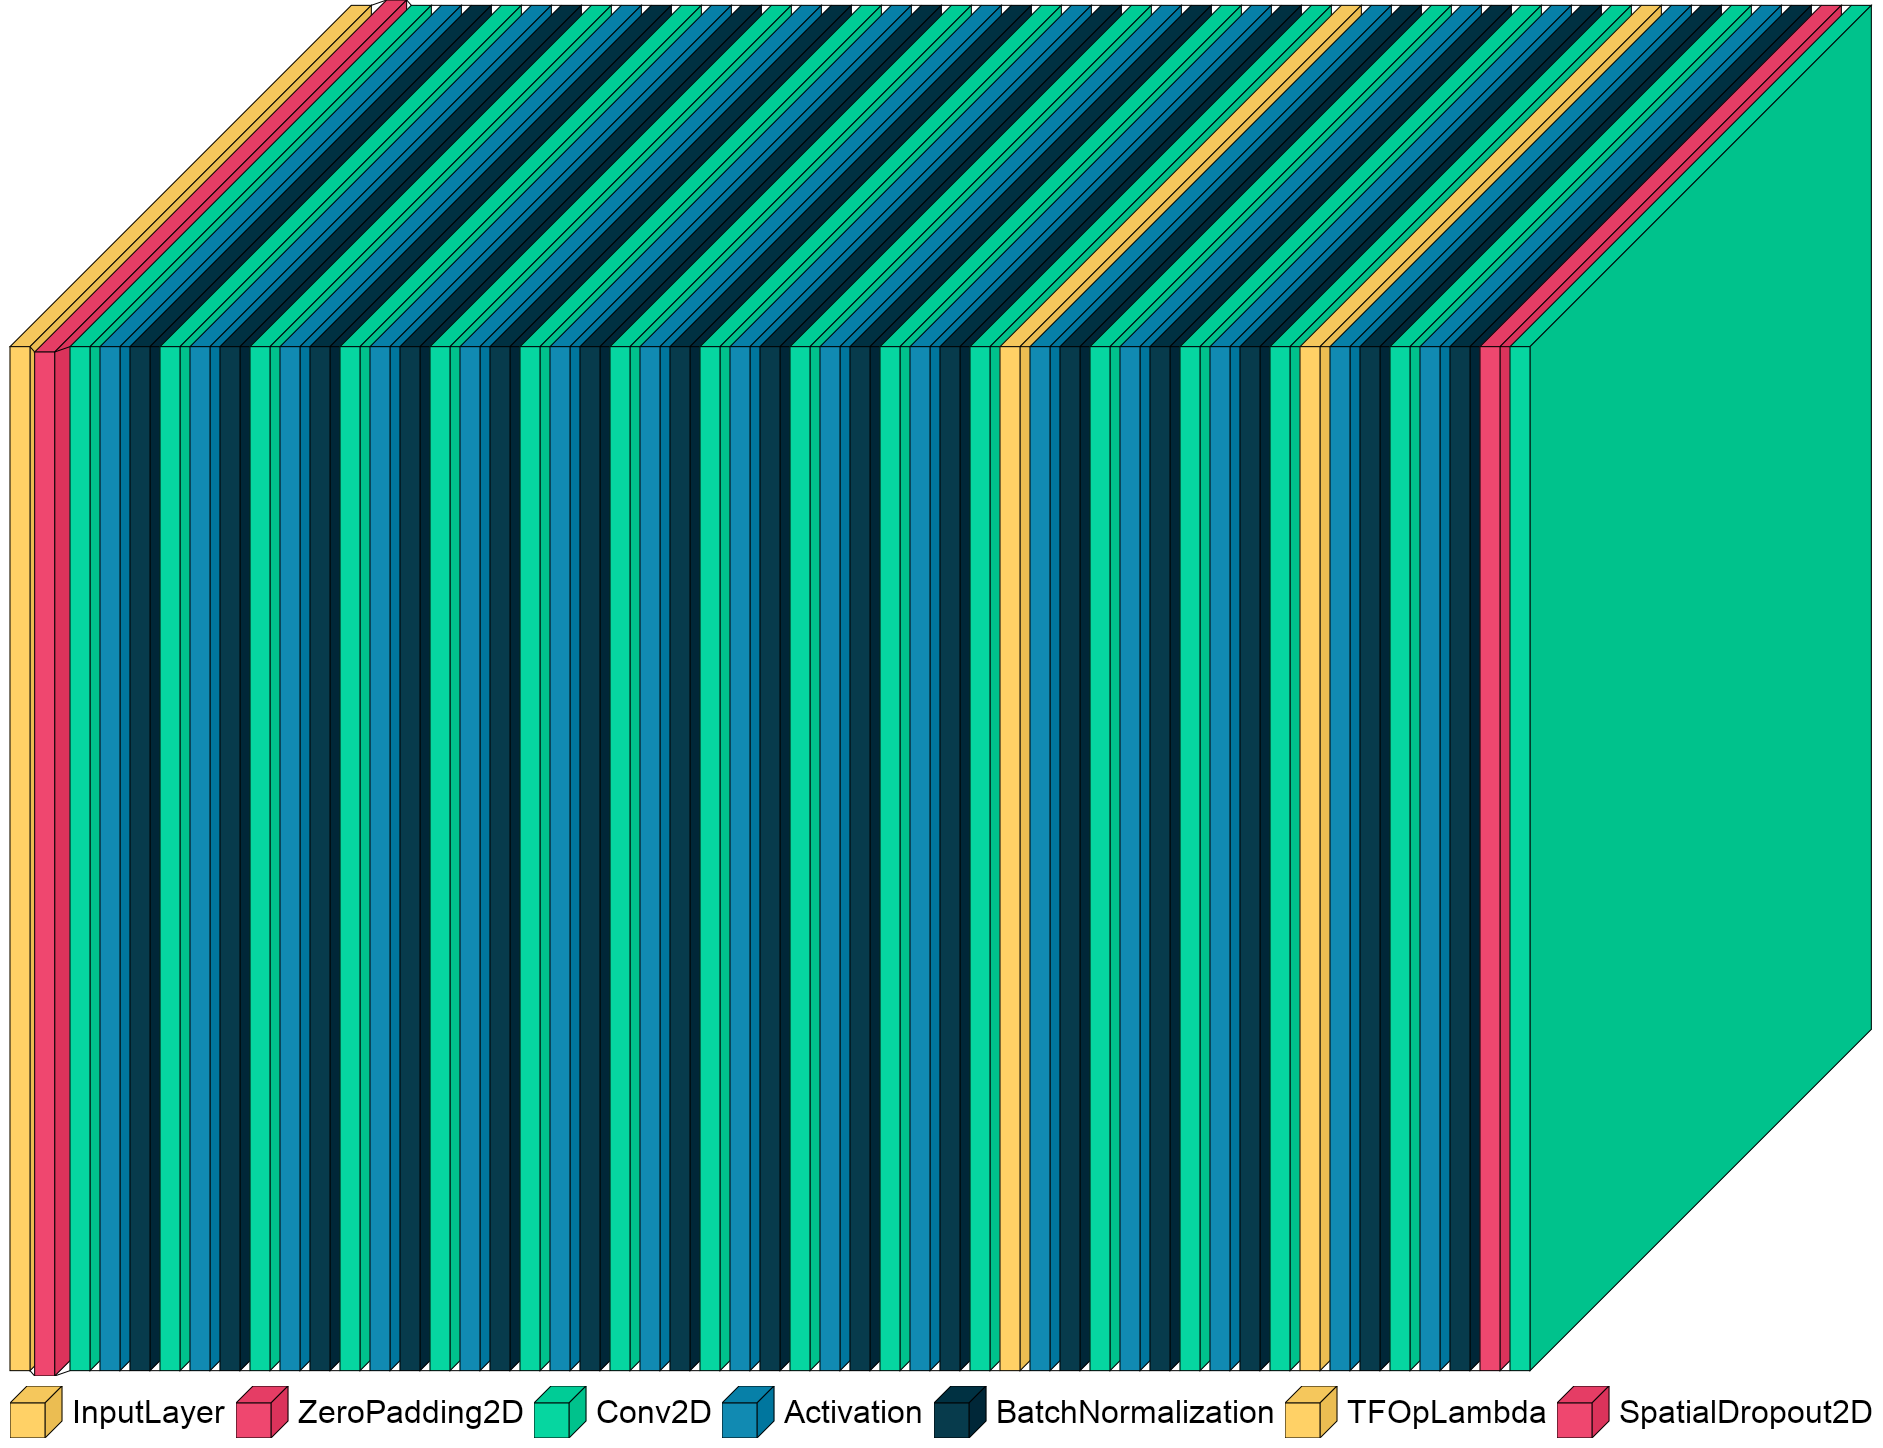

In [10]:
font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(autoencoder, legend=True, font=font, to_file='cnn-cv-model.png')

In [99]:
autoencoder = tf.keras.models.load_model('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/denoising_autoencoder_mozilla-final.h5')
test_files = ["/home/fdf7gn/Rainbowpassage/BobAL.wav"]
test_data = []
for file in test_files:
    y, sr = librosa.load(file, sr=16000)
    test_data.append(y)

max_len = max([len(x) for x in test_data])
padded_test_data = []
for i in range(len(test_data)):
    padding_len = max_len - len(test_data[i])
    padded_test_data.append(np.pad(test_data[i], (0, padding_len), mode='constant'))

test_spectrograms = []
for i in range(len(padded_test_data)):
    spec = librosa.stft(padded_test_data[i], n_fft=2048, hop_length=512)
    spec = np.abs(spec)
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    spec = zoom(spec, (256/spec.shape[0], 256/spec.shape[1]))
    test_spectrograms.append(spec)


test_spectrograms = np.array(test_spectrograms)
test_spectrograms = np.expand_dims(test_spectrograms, axis=-1)
test_spectrograms = np.repeat(test_spectrograms, 1, axis=-1)

loss = autoencoder.evaluate(test_spectrograms, test_spectrograms)
print("Test loss:", loss)

1/1 [==============================] - 0s 260ms/step - loss: 14.4849
Test loss: 14.484880447387695


In [23]:
def read_audio(filepath, sample_rate, normalize=True):
    """Read an audio file and return it as a numpy array"""
    audio, sr = librosa.load(filepath, sr=sample_rate)
    if normalize:
      div_fac = 1 / np.max(np.abs(audio)) / 3.0
      audio = audio * div_fac
    return audio, sr
        
def add_noise_to_clean_audio(clean_audio, noise_signal):
    """Adds noise to an audio sample"""
    if len(clean_audio) >= len(noise_signal):
        # print("The noisy signal is smaller than the clean audio input. Duplicating the noise.")
        while len(clean_audio) >= len(noise_signal):
            noise_signal = np.append(noise_signal, noise_signal)

    ## Extract a noise segment from a random location in the noise file
    ind = np.random.randint(0, noise_signal.size - clean_audio.size)

    noiseSegment = noise_signal[ind: ind + clean_audio.size]

    speech_power = np.sum(clean_audio ** 2)
    noise_power = np.sum(noiseSegment ** 2)
    noisyAudio = clean_audio + np.sqrt(speech_power / noise_power) * noiseSegment
    return noisyAudio

def play(audio, sample_rate):
    ipd.display(ipd.Audio(data=audio, rate=sample_rate))  # load a local WAV file

In [5]:
class FeatureExtractor:
    def __init__(self, audio, *, windowLength, overlap, sample_rate):
        self.audio = audio
        self.ffT_length = windowLength
        self.window_length = windowLength
        self.overlap = overlap
        self.sample_rate = sample_rate
        self.window = scipy.signal.hamming(self.window_length, sym=False)

    def get_stft_spectrogram(self):
        return librosa.stft(self.audio, n_fft=self.ffT_length, win_length=self.window_length, hop_length=self.overlap,
                            window=self.window, center=True)


    def get_audio_from_stft_spectrogram(self, stft_features):
        return librosa.istft(stft_features, win_length=self.window_length, hop_length=self.overlap,
                             window=self.window, center=True, length=self.window_length)

    def get_mel_spectrogram(self):
        return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',
                                           n_fft=self.ffT_length, hop_length=self.overlap, center=True)

    def get_audio_from_mel_spectrogram(self, M):
        return librosa.feature.inverse.mel_to_audio(M, sr=self.sample_rate, n_fft=self.ffT_length, hop_length=self.overlap,
                                             win_length=self.window_length, window=self.window,
                                             center=True, pad_mode='reflect', power=2.0, n_iter=32, length=None)

In [33]:
windowLength = 512
overlap      = 120
ffTLength    = 512
inputFs      = 48e3
fs           = 16000
numFeatures  = ffTLength//2 + 1
numSegments  = 8


In [34]:
cleanAudio, sr = read_audio('/home/fdf7gn/data/UVaVoice/Participant1/Larynx/16.wav', sample_rate=fs)
print("Min:", np.min(cleanAudio),"Max:",np.max(cleanAudio))
ipd.Audio(data=cleanAudio, rate=sr) # load a local WAV file

Min: -0.20414376 Max: 0.33333334


In [35]:
noisyAudio, sr = read_audio("/scratch/fdf7gn/data/UrbanSound8K/audio/fold5/100263-2-0-117.wav", sample_rate=fs)
print("Min:", np.min(noisyAudio),"Max:",np.max(noisyAudio))
ipd.Audio(data=noisyAudio, rate=sr)

Min: -0.30970553 Max: 0.33333334


In [36]:

cleanAudioFeatureExtractor = FeatureExtractor(cleanAudio, windowLength=windowLength, overlap=overlap, sample_rate=sr)
stft_features = cleanAudioFeatureExtractor.get_stft_spectrogram()
stft_features = np.abs(stft_features)
print("Min:", np.min(stft_features),"Max:",np.max(stft_features))

NameError: name 'FeatureExtractor' is not defined

In [37]:
noisyAudio = add_noise_to_clean_audio(cleanAudio, noisyAudio)
ipd.Audio(data=noisyAudio, rate=fs) # load a local WAV file

In [173]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import soundfile as sf

# Load the new audio file
audio_file = '/home/fdf7gn/Rainbowpassage/BobAL.wav'
audio, sr = librosa.load(audio_file)

# Preprocess the audio
n_fft = 512
hop_length = 256
n_mels = 256

spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_db = np.expand_dims(spec_db, axis=-1)

# Predict the denoised spectrogram
noisy_spec_db = spec_db.copy() # Replace with the actual noisy spectrogram
denoised_spec_db = autoencoder.predict(np.array([noisy_spec_db]))

# Convert the denoised spectrogram back to audio
denoised_spec = denoised_spec_db[0, :, :, 0]
max_spec = np.max(denoised_spec)
denoised_spec = librosa.db_to_power(denoised_spec, ref=max_spec)
denoised_audio = librosa.feature.inverse.mel_to_audio(denoised_spec, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Evaluate the denoised audio against the original audio
denoised_file = 'test_denoised1.wav'
sf.write(denoised_file, denoised_audio, sr)

1/1 [==============================] - 0s 379ms/step


In [182]:
outputAudio, sr = read_audio('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/test_denoised1.wav', sample_rate=fs)
print("Min:", np.min(outputAudio),"Max:",np.max(outputAudio))
ipd.Audio(data=outputAudio, rate=sr) # load a local WAV file

Min: -0.3024065 Max: 0.3333333


In [178]:
audio_file = '/home/fdf7gn/data/UVaVoice/Participant1/Larynx/16.wav'
audio, sr = librosa.load(audio_file)

# Preprocess the audio
n_fft = 512
hop_length = 256
n_mels = 256

spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_db = np.expand_dims(spec_db, axis=-1)

# Predict the denoised spectrogram
noisy_spec_db = spec_db.copy() # Replace with the actual noisy spectrogram
denoised_spec_db = autoencoder.predict(np.array([noisy_spec_db]))

# Convert the denoised spectrogram back to audio
denoised_spec = denoised_spec_db[0, :, :, 0]
max_spec = np.max(denoised_spec)
denoised_spec = librosa.db_to_power(denoised_spec, ref=max_spec)
denoised_audio = librosa.feature.inverse.mel_to_audio(denoised_spec, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Evaluate the denoised audio against the original audio
denoised_file = 'test_denoised.wav'
sf.write(denoised_file, denoised_audio, sr)

1/1 [==============================] - 0s 240ms/step


In [179]:
outputAudio, sr = read_audio('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/test_denoised.wav', sample_rate=fs)
print("Min:", np.min(outputAudio),"Max:",np.max(outputAudio))
ipd.Audio(data=outputAudio, rate=sr) # load a local WAV file

Min: -0.33042398 Max: 0.3333333


Text(0.5, 1.0, 'Denoised Audio')

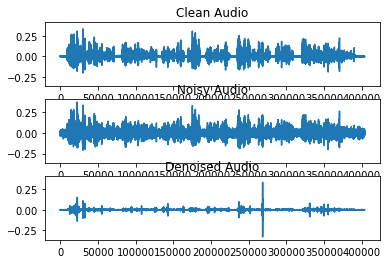

In [180]:
import matplotlib.pyplot as plt
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)

ax1.plot(cleanAudio)
ax1.set_title("Clean Audio")

ax2.plot(noisyAudio)
ax2.set_title("Noisy Audio")

ax3.plot(outputAudio)
ax3.set_title("Denoised Audio")

In [181]:
noisyAudio, sr = read_audio("/home/fdf7gn/Rainbowpassage/BobAL.wav", sample_rate=fs)
print("Min:", np.min(noisyAudio),"Max:",np.max(noisyAudio))
ipd.Audio(data=noisyAudio, rate=sr)

Min: -0.3198052 Max: 0.3333333


Text(0.5, 1.0, 'Denoised Audio')

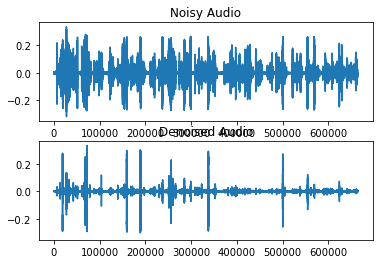

In [185]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(2, 1, sharey=True)

ax1.plot(noisyAudio)
ax1.set_title("Noisy Audio")

ax2.plot(outputAudio)
ax2.set_title("Denoised Audio")

In [21]:
audio_file = '/home/fdf7gn/data/UVaVoice/Participant1/Larynx/16.wav'
audio, sr = librosa.load(audio_file)

# Preprocess the audio
n_fft = 512
hop_length = 2180
n_mels = 256

spec = librosa.feature.melspectrogram(y=audio, sr=16000, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_db = np.expand_dims(spec_db, axis=-1)

# Predict the denoised spectrogram
noisy_spec_db = spec_db.copy() # Replace with the actual noisy spectrogram
denoised_spec_db = autoencoder.predict(np.array([noisy_spec_db]))

# Convert the denoised spectrogram back to audio
denoised_spec = denoised_spec_db[0, :, :, 0]
max_spec = np.max(denoised_spec)
denoised_spec = librosa.db_to_power(denoised_spec, ref=max_spec)
denoised_audio = librosa.feature.inverse.mel_to_audio(denoised_spec, sr=sr, n_fft=n_fft, hop_length=hop_length)

# Evaluate the denoised audio against the original audio
denoised_file = 'test_denoised2.wav'
sf.write(denoised_file, denoised_audio, sr)

1/1 [==============================] - 0s 89ms/step


In [26]:
output1Audio, sr = read_audio('/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/test_denoised.wav', sample_rate=16000)
print("Min:", np.min(output1Audio),"Max:",np.max(output1Audio))
ipd.Audio(data=output1Audio, rate=sr) # load a local WAV file

Min: -0.33042398 Max: 0.3333333


In [27]:
audio_file = '/home/fdf7gn/data/UVaVoice/Participant1/Larynx/16.wav'
y, sr = librosa.load(audio_file)
S = np.abs(librosa.stft(y))
S

array([[3.65280844e-02, 1.39883563e-01, 2.74079800e-01, ...,
        2.16223642e-01, 2.28133917e-01, 1.36062533e-01],
       [3.34721021e-02, 9.81859490e-02, 1.59530848e-01, ...,
        1.15744874e-01, 1.38974413e-01, 8.82337540e-02],
       [2.94376519e-02, 5.54749593e-02, 7.67493695e-02, ...,
        4.46013212e-02, 9.47275460e-02, 6.79703951e-02],
       ...,
       [2.14129295e-06, 1.18124024e-06, 9.97665097e-08, ...,
        4.26646920e-07, 4.00042045e-04, 1.00522244e-03],
       [2.14174679e-06, 1.13505268e-06, 1.59726383e-07, ...,
        2.22504923e-07, 4.00291872e-04, 1.00547157e-03],
       [2.14196666e-06, 1.03451828e-06, 1.70310585e-07, ...,
        4.79154103e-08, 4.00527962e-04, 1.00483489e-03]], dtype=float32)

In [28]:
S_left = librosa.stft(y, center=False)

In [29]:
D_short = librosa.stft(y, hop_length=64)

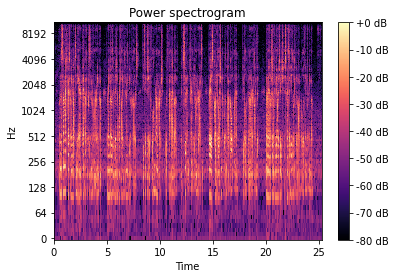

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

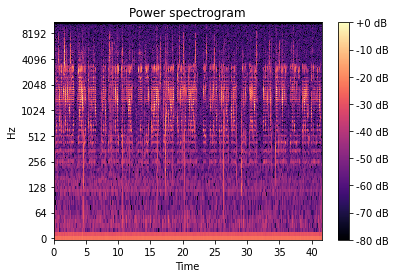

In [31]:
audio_file = '/home/fdf7gn/Rainbowpassage/BobAL.wav'
y, sr = librosa.load(audio_file)
S = np.abs(librosa.stft(y))
S_left = librosa.stft(y, center=False)
D_short = librosa.stft(y, hop_length=64)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

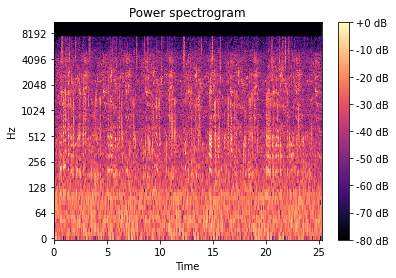

In [38]:
audio_file = '/home/fdf7gn/capstone/Electrolarynx_Capstone/notebooks/download.wav'
y, sr = librosa.load(audio_file)
S = np.abs(librosa.stft(y))
S_left = librosa.stft(y, center=False)
D_short = librosa.stft(y, hop_length=64)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")